In [1]:
import re

import matplotlib.pyplot as plt
import nltk
import pandas as pd
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    roc_curve,
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from wordcloud import WordCloud
from gensim.models import KeyedVectors
import sys
sys.path.insert(1, "nlp/utils")

from preprocess import *

/home/m-joaopr/projetos/nlp/env/lib/python3.7/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df_train = pd.read_csv(
    "data/imdb-reviews-pt-br.csv",
    usecols=["text_pt","sentiment"]
)

In [3]:
df_train.head()

,text_pt,sentiment
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,Este é um exemplo do motivo pelo qual a maiori...,neg
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,Filmes de fotos de latão não é uma palavra apr...,neg


/home/m-joaopr/projetos/nlp/env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sentiment', ylabel='count'>

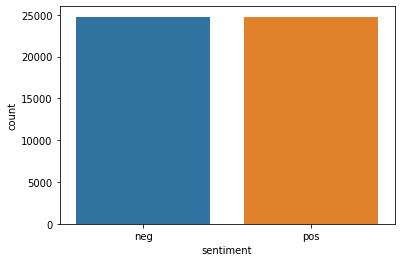

In [4]:
sns.countplot(df_train.sentiment)

In [5]:
def encoder(df):
    df.replace(to_replace="neg",value =0, inplace=True)
    df.replace(to_replace="pos",value=1,inplace=True)

In [6]:
encoder(df_train['sentiment'])

/home/m-joaopr/projetos/nlp/env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sentiment', ylabel='count'>

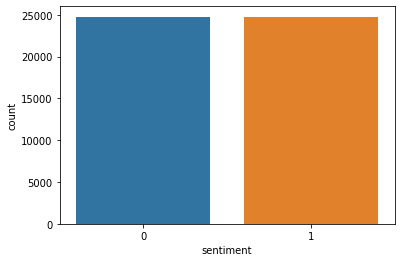

In [7]:
sns.countplot(df_train.sentiment)

In [8]:
lm = WordNetLemmatizer()

In [9]:
corpus = [preprocess(text) for text in df_train.text_pt.tolist()]

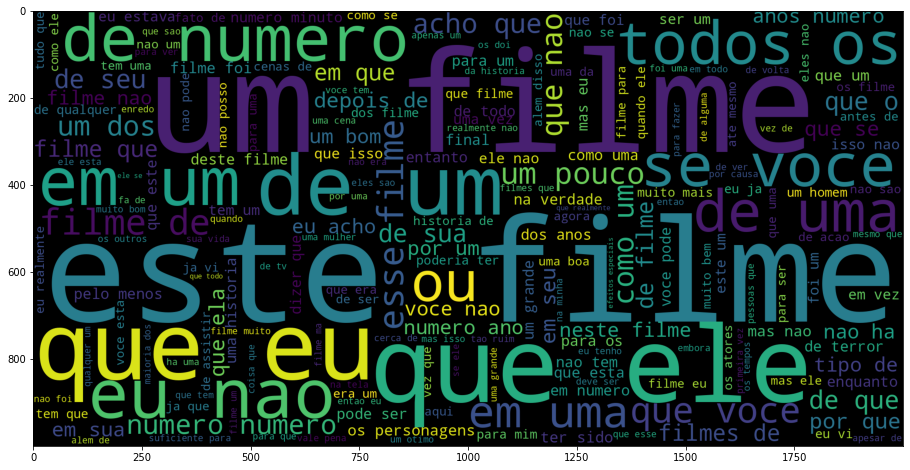

In [10]:
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width=2000,height=1000,background_color ='black',min_font_size = 10).generate(word_cloud)
plt.figure(figsize = (20,8))
plt.imshow(wordcloud)

# Model training

In [11]:
data = "/word2vec/skip_s100.txt"
modelo = KeyedVectors.load_word2vec_format(data)

In [12]:
def word_embedding_generator(text):
    matriz = []

    for word in text.split():
        try:
            vetor = modelo.get_vector(word)
        except KeyError:
            vetor = modelo.get_vector("unknown")
            
        matriz.append(vetor)
            
    phrase = np.asarray(matriz).mean(axis=0)
    return phrase

In [13]:
X = np.asarray([word_embedding_generator(text) for text in corpus])
y = np.asarray(df_train.sentiment.tolist())

In [14]:
X

array([[ 0.01799199, -0.00503605,  0.01593938, ..., -0.00322903,
         0.01077311,  0.04357468],
       [ 0.03343473,  0.00294197, -0.00268907, ...,  0.00905668,
        -0.02827043,  0.05761597],
       [ 0.00831078, -0.01031087, -0.01748064, ..., -0.0055351 ,
         0.00426366,  0.06287381],
       ...,
       [ 0.0141207 , -0.01588901, -0.0272466 , ..., -0.03233567,
        -0.01513558,  0.07166554],
       [ 0.05854474, -0.02565489,  0.01144691, ...,  0.01454401,
        -0.02440288,  0.04748153],
       [ 0.00810859, -0.03873339, -0.05553027, ...,  0.00636799,
        -0.01272926,  0.05952733]], dtype=float32)

In [15]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [16]:
RANDOM_STATE = 42

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2,
                                                          random_state=RANDOM_STATE,
                                                          stratify=y)

In [17]:
clf = LogisticRegression(random_state=0, max_iter=200).fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

In [18]:
print(classification_report(Y_test, Y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75      4953
           1       0.75      0.74      0.74      4939

    accuracy                           0.75      9892
   macro avg       0.75      0.75      0.75      9892
weighted avg       0.75      0.75      0.75      9892

